#Zhrnutie
nema zmysel na tieto energo data skusat len jednoduchu arimu alebo exponencialne vyrovnavanie kvoli tomu, ze je tam viacero sezonnosti. Dali by sa samozrejme natrenovat pre jednotlive sezonnosti rozne modely, ale aby som si to zjednodusil, tak pouzijem metody, ktroe to uz v sebe priamo zahrnaju a to tbats a Holt-Winters. S nimi sa budem porovnavat.
Ked zostane cas, tak mozem pouzit nieco ako triple smoothing od Bc. Janeckovej.

#Co dalej
spocitat priebeh chyby predpovedania pre tieto dve metody a to iste aj na dalsich datach. Pre kazdy dataset si odozit cely priebeh chyby na to, aby som vedel spocitat priemernu chybu a priemernu variabilitu predikcie v priebehu trenovania. Vysledok teda bude plot priebehu, priemerna chyba, mozno histogram chyb ale to by mala nahradit variancia chyby. Respektive priebeh variancie chyby.

In [2]:
%load_ext rmagic

/usr/local/lib/python2.7/dist-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [3]:
%R library('forecast')

Error in library("forecast") : there is no package called ‘forecast’


In [2]:
filename = "../data/01_zilina_suma.csv"

In [1]:
import rpy2.robjects as robjects

In [4]:
robjects.r('''
        library('forecast')
        library('stats')

        filename <- "../data/01_zilina_suma.csv"
        symbol_length <- 96
        step <- 48
        week <- symbol_length * 7
        data = read.csv(filename, header = TRUE)
        start_date <- strptime(data$DATUM[1], "%d/%m/%Y")
        end_date <- strptime(data$DATUM[length(data$DATUM)], "%d/%m/%Y")
        series <- ts(data$SUM_of_MNOZSTVO, start=as.numeric(start_date), frequency=96)

        ''')

robjects.r('''
    predict_f <- function(i, series){
        x <- ts(series[1:i], frequency=96)
        m <- HoltWinters(x, beta = FALSE)
        fc <- forecast.HoltWinters(m, h=48)
        return(fc$mean)
    }
    ''')
predict_function = robjects.globalenv['predict_f']
r_series = robjects.globalenv['series']

In [6]:
predict_function(600, r_series)[0]

20747.57359391351

In [14]:
%%R
predict_f <- function(i, series){
        x <- ts(series[1:i], frequency=96)
        m <- HoltWinters(x, beta = FALSE)
        fc <- forecast.HoltWinters(m, h=48)
        return(fc$mean)
    }
predict_f(600, series)

Error in predict(object, n.ahead = h, prediction.interval = TRUE, level = level[1]/100) : 
  unused arguments (n.ahead = h, prediction.interval = TRUE, level = level[1]/100)


In [26]:
%%R
x <- ts(series[1:600], frequency=96)
m <- HoltWinters(x, beta = FALSE)
fc <- forecast.HoltWinters(m, h=48)
fc$mean

Error in predict(object, n.ahead = h, prediction.interval = TRUE, level = level[1]/100) : 
  unused arguments (n.ahead = h, prediction.interval = TRUE, level = level[1]/100)


In [7]:
%%R
step_size <- 96
week <- step_size*7

In [7]:
%%R -i filename
data = read.csv(filename, header = TRUE)
summary(data)

        DATUM            CAS         SUM_of_MNOZSTVO
 26/10/2014:  100   Min.   :-105.0   Min.   :10481  
 27/10/2013:  100   1st Qu.: 270.0   1st Qu.:24331  
 01/01/2014:   96   Median : 630.0   Median :34639  
 01/01/2015:   96   Mean   : 634.4   Mean   :35503  
 01/02/2014:   96   3rd Qu.: 990.0   3rd Qu.:46460  
 01/02/2015:   96   Max.   :1380.0   Max.   :61625  
 (Other)   :56636                                   


In [19]:
%%R
start_date <- strptime(data$DATUM[1], "%d/%m/%Y")
end_date <- strptime(data$DATUM[length(data$DATUM)], "%d/%m/%Y")
series <- ts(data$SUM_of_MNOZSTVO, start=as.numeric(start_date), frequency=96)
summary(series)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10480   24330   34640   35500   46460   61630 


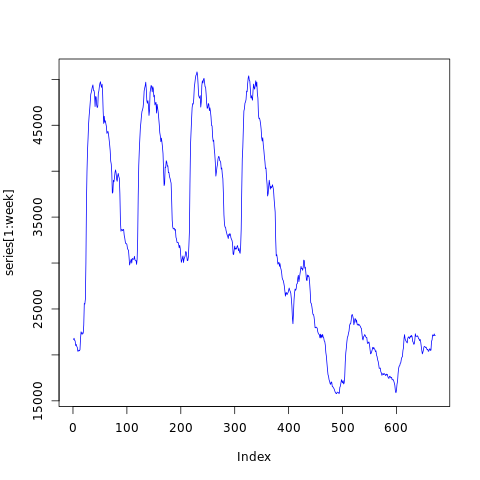

In [8]:
%R plot(series[1:week], type='l', col='blue')

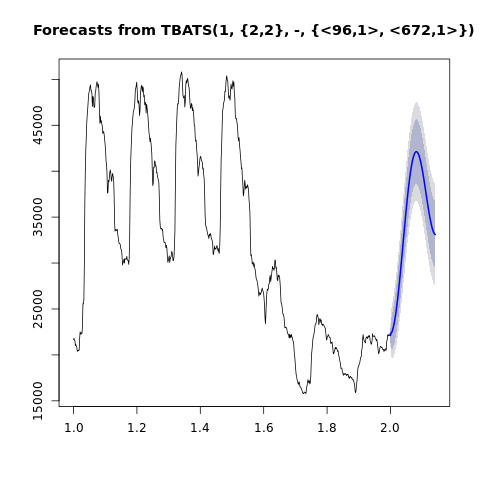

In [9]:
%%R
y <- msts(series[1:week], seasonal.periods=c(96,96*7))
fit <- tbats(y, use.trend=FALSE, use.damped.trend=FALSE)
fc <- forecast(fit, h=96)
plot(fc)

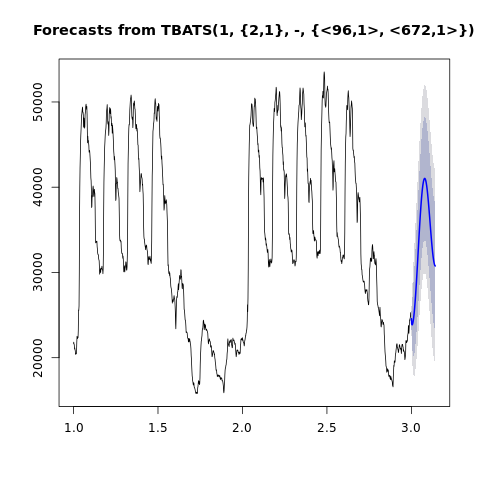

In [77]:
%%R
y <- msts(series[1:(2*week)], seasonal.periods=c(96,96*7))
fit <- tbats(y)
fc <- forecast(fit, h=96)
plot(fc)

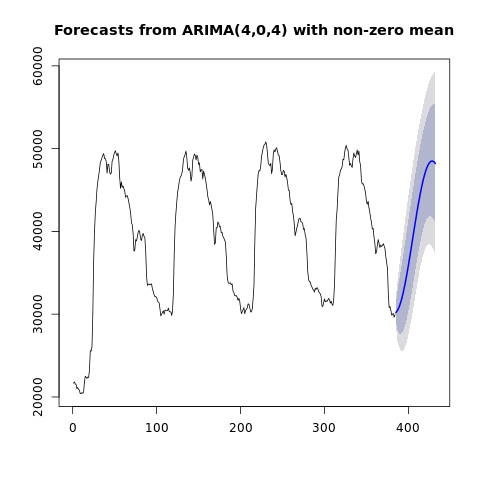

In [75]:
%%R
y <- series[1:(4*96)]
fit=Arima(y,order=c(4,0,4), seasonal=c(96,96*7),include.drift=FALSE)
fc <- forecast(fit, h=48)
plot(fc)

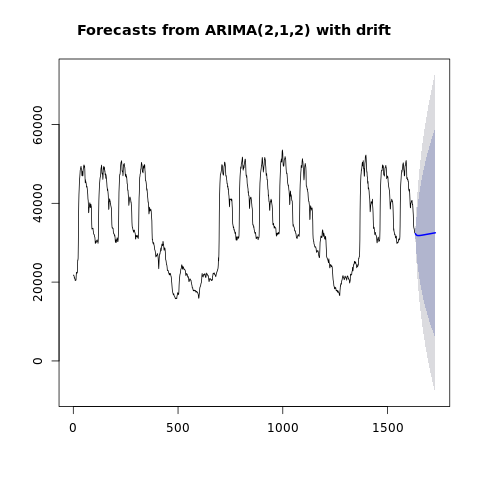

In [71]:
%%R
y <- series[1:(2*week+3*96)]
fit=auto.arima(y)
fc <- forecast(fit, h=96)
plot(fc)

In [20]:
%R library('stats')

array(['forecast', 'timeDate', 'zoo', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [82]:
%%R
m2 <- HoltWinters(series[1:(2*week+3*96)], gamma = FALSE, beta = FALSE)
lines(m2)

Error in xy.coords(x, y) : 
  'x' is a list, but does not have components 'x' and 'y'


In [21]:
%%R
(m <- HoltWinters(ts(series[1:(2*week+4*96)], frequency=96)))
fc <- forecast.HoltWinters(m, h=96)
plot(fc)
plot(m)
plot(fitted(m))

Error in predict(object, n.ahead = h, prediction.interval = TRUE, level = level[1]/100) : 
  unused arguments (n.ahead = h, prediction.interval = TRUE, level = level[1]/100)


In [16]:
%%R
#Exponential smoothing (so sezonnostou)
x <- ts(series[1:(2*week+4*96)], frequency=96)
m <- HoltWinters(x, beta = FALSE)
fc <- forecast.HoltWinters(m, h=48)
plot(fc)
plot(m)
plot(fitted(m))

Error in predict(object, n.ahead = h, prediction.interval = TRUE, level = level[1]/100) : 
  unused arguments (n.ahead = h, prediction.interval = TRUE, level = level[1]/100)


In [65]:
%%R
print(names(fc))
length(fc$mean)

 [1] "method"    "model"     "level"     "mean"      "lower"     "upper"    
 [7] "x"         "xname"     "fitted"    "residuals"
[1] 48


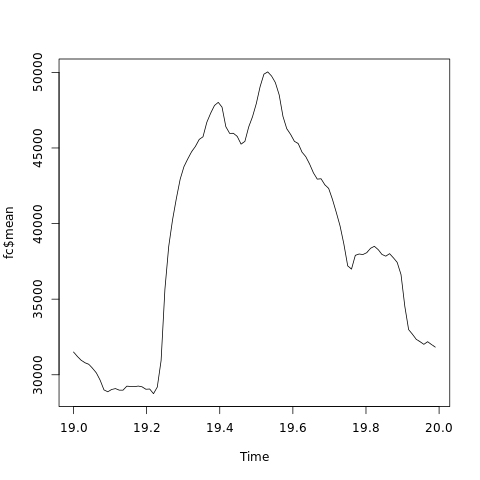

In [52]:
%R plot(fc$mean, type='l')

In [55]:
%R prediction <- fc$mean
%Rpull prediction

In [57]:
prediction

31507.043124617328

In [10]:
import numpy as np
import pandas as pd

In [11]:
def smape(prediction, target):
    return np.mean(np.abs(target - prediction) / np.abs(target + prediction)) * 200

def rmse(prediction, target):
    return np.sqrt(((prediction - target) ** 2).mean())

In [12]:
filename = "../data/01_zilina_suma.csv"
data = pd.DataFrame.from_csv(filename, index_col=[0,1])

In [17]:
week = 96*7
symbol_length = 96
step = 48

%R symbol_length <- 96
%R step <- 48
%R week <- symbol_length * 7

test_data = data.SUM_of_MNOZSTVO[:(week*85)]

In [ ]:
i = week
length = len(test_data)
prediction_file = open('prediction.csv', 'a')
target_file = open('target.csv', 'a')
smape_file = open('smape.csv','a')
rmse_file = open('rmse.csv','a')    
while(i <= length - (step * 2)):
    print(i)
    %R -i i x <- ts(series[1:i], frequency=symbol_length)
    %R m <- HoltWinters(x, beta = FALSE)
    %R fc <- forecast.HoltWinters(m, h=step)
    %R -o prediction prediction <- fc$mean 
    target = test_data[i:(i+step)]
    pd.Series(target).to_csv(target_file, header=False)
    pd.Series(prediction).to_csv(prediction_file, header=False)
    pd.Series(rmse(prediction, target)).to_csv(rmse_file, header=False)
    pd.Series(smape(prediction, target)).to_csv(smape_file, header=False)
    i+=step
    
prediction_file.close()
target_file.close()
smape_file.close()
rmse_file.close()


672
720
768
816
864
912
960
1008
1056
1104
1152
1200
1248
1296
1344
1392
1440
1488
1536
1584
1632
1680
1728
1776
1824
1872
1920
1968
2016
2064
2112
2160
2208
2256
2304
2352
2400
2448
2496
2544
2592
2640
2688
2736
2784
2832
2880
2928
2976
3024
3072
3120
3168
3216
3264
3312
3360
3408
3456
3504
3552
3600
3648
3696
3744
3792
3840
3888
3936
3984
4032
4080
4128
4176
4224
4272
4320
4368
4416
4464
4512
4560
4608
4656
4704
4752
4800
4848
4896
4944
4992
5040
5088
5136
5184
5232
5280
5328
5376
5424
5472
5520
5568
5616
5664
5712
5760
5808
5856
5904
5952
6000
6048
6096
6144
6192
6240
6288
6336
6384
6432
6480
6528
6576
6624
6672
6720
6768
6816
6864
6912
6960
7008
7056
7104
7152
7200
7248
7296
7344
7392
7440
7488
7536
7584
7632
7680
7728
7776
7824
7872
7920
7968
8016
8064
8112
8160
8208
8256
8304
8352
8400
8448
8496
8544
8592
8640
8688
8736
8784
8832
8880
8928
8976
9024
9072
9120
9168
9216
9264
9312
9360
9408
9456
9504
9552
9600
9648
9696
9744
9792
9840
9888
9936
9984
10032
10080
10128
10176
10224
10

In [ ]:
#t_prediction[0].to_csv('prediction.csv')
#t_target['SUM_of_MNOZSTVO'].to_csv('target.csv')
#pd.Series(smape_result).to_csv("smape.csv")
#pd.Series(rmse_result).to_csv("rmse.csv")

In [72]:
#index = test_data.index
#t_prediction[0].index = index
#t_target['SUM_of_MNOZSTVO'].index = index

t_prediction[0].plot()
t_target['SUM_of_MNOZSTVO'].plot()

TypeError: constructor returned NULL

In [ ]:
pd.Series(smape_result).plot()

In [79]:
np.mean(smape_result)

12.984612119121177